In [288]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [208]:
import pathlib
data_dir = r"D:\02 Personal Files\Thesis Related\Main Thesis Project\main\thesis\datasets\final_face_crops"
data_dir = pathlib.Path(data_dir)

In [209]:
print(data_dir)

D:\02 Personal Files\Thesis Related\Main Thesis Project\main\thesis\datasets\final_face_crops


D:\02 Personal Files\Thesis Related\Main Thesis Project\main\thesis\datasets\final_face_crops\task_1\img_00000.jpg


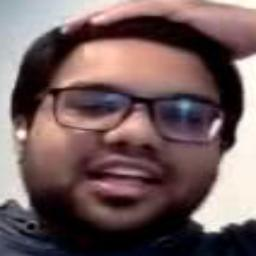

In [212]:
face = list(data_dir.glob('task_1/*'))
print(face[0])
PIL.Image.open(str(face[0]))

In [231]:
img_height, img_width = 224, 224
batch_size = 32

In [253]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 86595 files belonging to 9 classes.
Using 69276 files for training.


In [254]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 86595 files belonging to 9 classes.
Using 17319 files for validation.


In [255]:
class_names = train_ds.class_names
print(class_names)

['task_1', 'task_2', 'task_3', 'task_4', 'task_5', 'task_6', 'task_7', 'task_8', 'task_9']


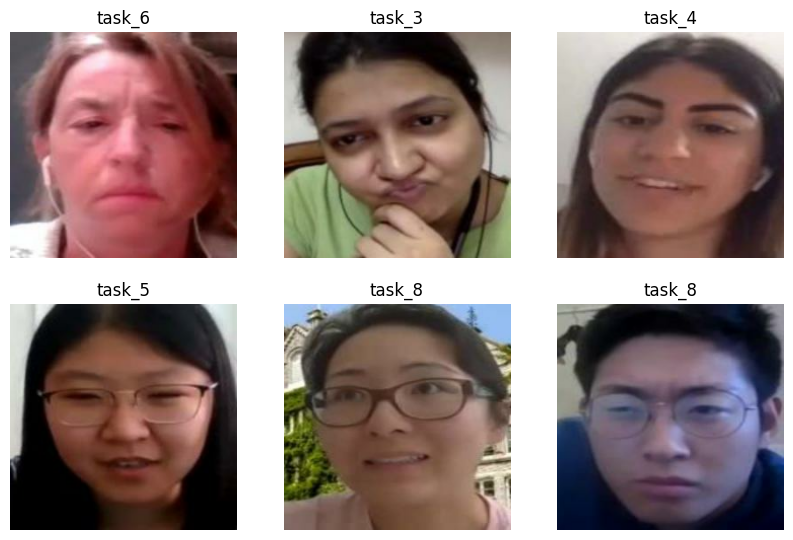

In [256]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [289]:
input_tensor = Input(shape=(224, 224, 3))

x = Flatten()(input_tensor)
x = Dense(512, activation='relu')(x)
output_tensor = Dense(9, activation='softmax')(x)  # 9 classes

# Create the model
simple_model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
simple_model.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

# Print model summary
simple_model.summary()

# Fit the model with a small subset of data (if you have enough data for testing)
history = simple_model.fit(
    train_ds.take(10),  # Use a small subset for testing
    validation_data=val_ds.take(10),
    epochs=1
)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_61 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,075,465 (294.02 MB)

 Trainable params: 77,075,465 (294.02 MB)

 Non-trainable params: 0 (0.00 B)

ValueError: 'ResNet50V2Model(finetuned)_dense_40_kernel_momentum' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-9_.\\/>-]*$

# Training The Model


In [284]:
pretrained_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
    weights='imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable = False

input_tensor = Input(shape=(224, 224, 3))

x = pretrained_model(input_tensor)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output_tensor = Dense(9, activation='softmax')(x)

resnet_model = Model(inputs=input_tensor, outputs=output_tensor, name = "ResNet50V2")

In [278]:
resnet_model.summary()

Model: "ResNet50V2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_58 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 2048)           │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,618,505 (93.91 MB)

 Trainable params: 1,053,705 (4.02 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [285]:
resnet_model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [287]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


IndexError: list index out of range

In [281]:
for images, labels in train_ds.take(1):
    print("Labels shape:", labels.shape)


Labels shape: (32,)


# Evaluating The Model

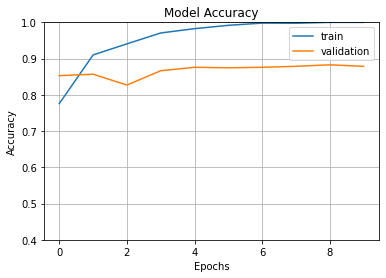

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

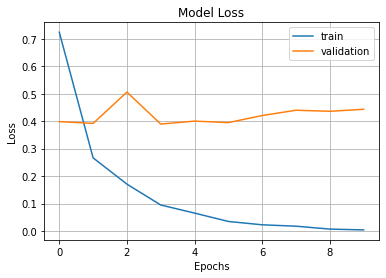

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [ ]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [45]:
pred=resnet_model.predict(image)
print(pred)

[[8.2068445e-06 1.5209365e-06 9.9347222e-01 9.5006551e-05 6.4231041e-03]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
